# Neural Networks

In [1]:
import warnings

import h5py
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.utils.class_weight import compute_class_weight

sns.set_theme(style="darkgrid")
tf.random.set_seed(13)
warnings.filterwarnings("ignore")

- **Data Description**: The data set contains information on various signal tests performed:
    - Parameters: Various measurable signal parameters.
    - Signal_Quality: Final signal strength or quality

To build a classifier which can use the given parameters to determine the signal strength or quality.

## Data import and Understanding

In [2]:
# https://www.kaggle.com/datasets/dsrivastava2020/part-123-signalcsv

signals_df = pd.read_csv("data/signal.csv")

In [3]:
signals_df.shape

(1599, 12)

In [4]:
signals_df.columns

Index(['Parameter 1', 'Parameter 2', 'Parameter 3', 'Parameter 4',
       'Parameter 5', 'Parameter 6', 'Parameter 7', 'Parameter 8',
       'Parameter 9', 'Parameter 10', 'Parameter 11', 'Signal_Strength'],
      dtype='object')

In [5]:
signals_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Parameter 1      1599 non-null   float64
 1   Parameter 2      1599 non-null   float64
 2   Parameter 3      1599 non-null   float64
 3   Parameter 4      1599 non-null   float64
 4   Parameter 5      1599 non-null   float64
 5   Parameter 6      1599 non-null   float64
 6   Parameter 7      1599 non-null   float64
 7   Parameter 8      1599 non-null   float64
 8   Parameter 9      1599 non-null   float64
 9   Parameter 10     1599 non-null   float64
 10  Parameter 11     1599 non-null   float64
 11  Signal_Strength  1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [6]:
signals_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Parameter 1,1599.0,8.319637,1.741096,4.60000,7.1000,7.90000,9.200000,15.90000
Parameter 2,1599.0,0.527821,0.179060,0.12000,0.3900,0.52000,0.640000,1.58000
Parameter 3,1599.0,0.270976,0.194801,0.00000,0.0900,0.26000,0.420000,1.00000
Parameter 4,1599.0,2.538806,1.409928,0.90000,1.9000,2.20000,2.600000,15.50000
Parameter 5,1599.0,0.087467,0.047065,0.01200,0.0700,0.07900,0.090000,0.61100
Parameter 6,1599.0,15.874922,10.460157,1.00000,7.0000,14.00000,21.000000,72.00000
Parameter 7,1599.0,46.467792,32.895324,6.00000,22.0000,38.00000,62.000000,289.00000
Parameter 8,1599.0,0.996747,0.001887,0.99007,0.9956,0.99675,0.997835,1.00369
Parameter 9,1599.0,3.311113,0.154386,2.74000,3.2100,3.31000,3.400000,4.01000
Parameter 10,1599.0,0.658149,0.169507,0.33000,0.5500,0.62000,0.730000,2.00000


In [7]:
signals_df.head()

,Parameter 1,Parameter 2,Parameter 3,Parameter 4,Parameter 5,Parameter 6,Parameter 7,Parameter 8,Parameter 9,Parameter 10,Parameter 11,Signal_Strength
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [8]:
signals_df.tail()

,Parameter 1,Parameter 2,Parameter 3,Parameter 4,Parameter 5,Parameter 6,Parameter 7,Parameter 8,Parameter 9,Parameter 10,Parameter 11,Signal_Strength
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5
1598,6.0,0.310,0.47,3.6,0.067,18.0,42.0,0.99549,3.39,0.66,11.0,6


1.B. Check for missing values and print percentage for each attribute.

In [9]:
round((signals_df.isnull().sum() / signals_df.isnull().count()) * 100, 2)

Parameter 1        0.0
Parameter 2        0.0
Parameter 3        0.0
Parameter 4        0.0
Parameter 5        0.0
Parameter 6        0.0
Parameter 7        0.0
Parameter 8        0.0
Parameter 9        0.0
Parameter 10       0.0
Parameter 11       0.0
Signal_Strength    0.0
dtype: float64

**Observation** No null values found

In [10]:
len(signals_df[signals_df.duplicated()])

240

In [11]:
signals_df[signals_df.duplicated(keep=False)]

,Parameter 1,Parameter 2,Parameter 3,Parameter 4,Parameter 5,Parameter 6,Parameter 7,Parameter 8,Parameter 9,Parameter 10,Parameter 11,Signal_Strength
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
9,7.5,0.500,0.36,6.1,0.071,17.0,102.0,0.99780,3.35,0.80,10.5,5
11,7.5,0.500,0.36,6.1,0.071,17.0,102.0,0.99780,3.35,0.80,10.5,5
22,7.9,0.430,0.21,1.6,0.106,10.0,37.0,0.99660,3.17,0.91,9.5,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1567,7.2,0.695,0.13,2.0,0.076,12.0,20.0,0.99546,3.29,0.54,10.1,5
1579,6.2,0.560,0.09,1.7,0.053,24.0,32.0,0.99402,3.54,0.60,11.3,5
1581,6.2,0.560,0.09,1.7,0.053,24.0,32.0,0.99402,3.54,0.60,11.3,5
1592,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6


In [12]:
signals_df.drop_duplicates(inplace=True)

In [13]:
signals_df.shape

(1359, 12)

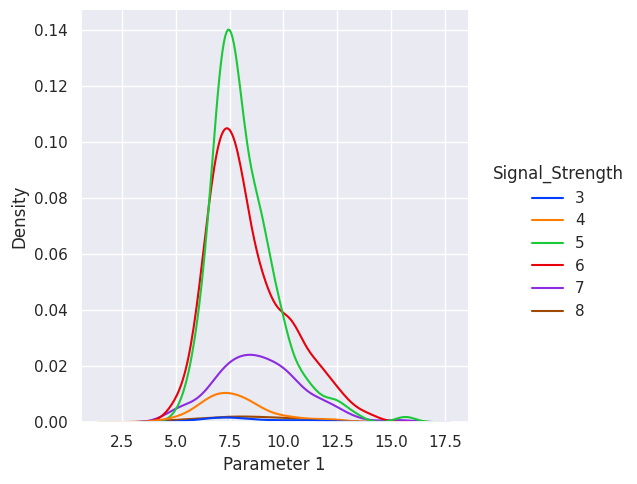

In [14]:
sns.displot(
    signals_df, x="Parameter 1", kind="kde", hue="Signal_Strength", palette="bright"
)

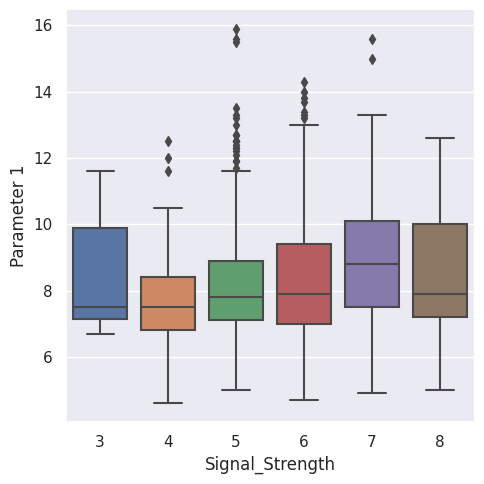

In [15]:
# Visualising with box plot for Parameter 1
sns.catplot(signals_df, x="Signal_Strength", y="Parameter 1", kind="box")

In [16]:
parameters = [
    column_name
    for column_name in signals_df.columns
    if "Signal_Strength" != column_name
]

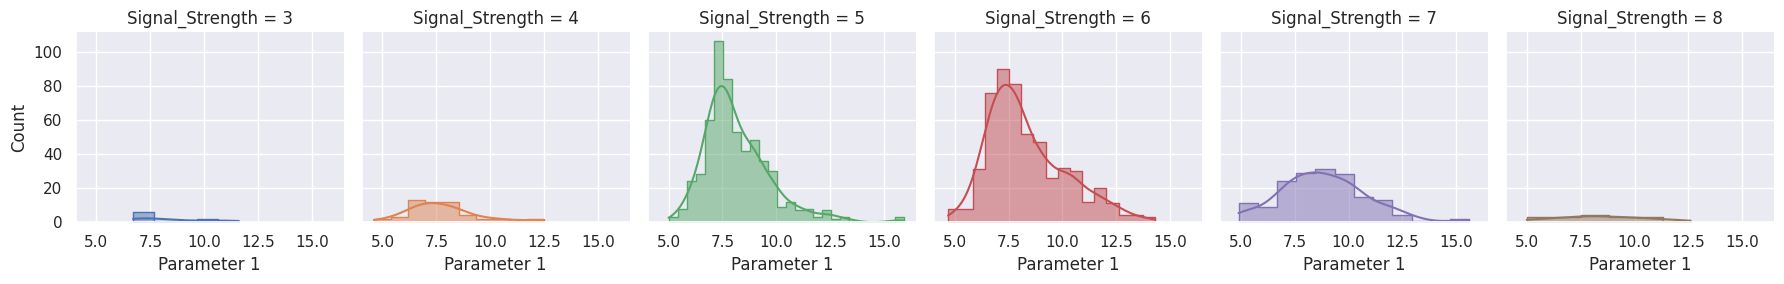

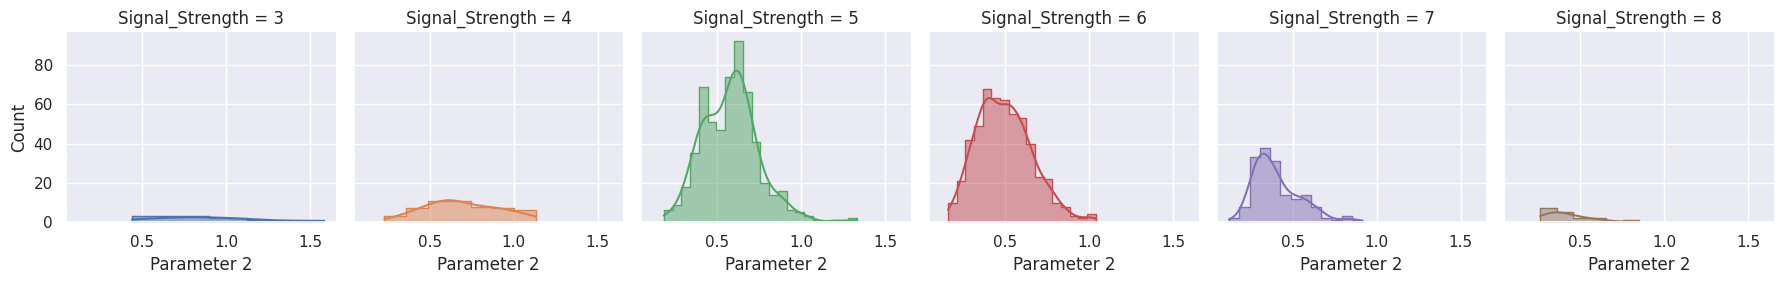

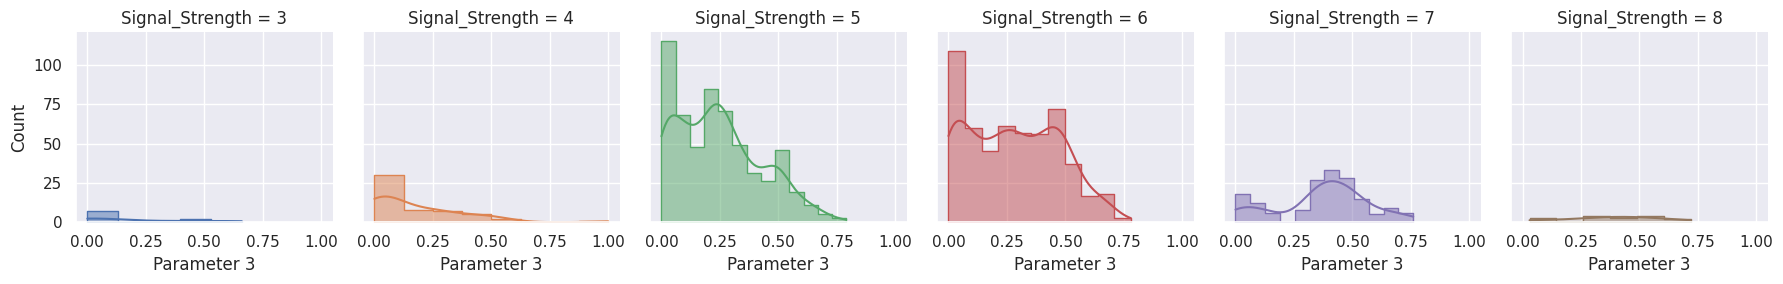

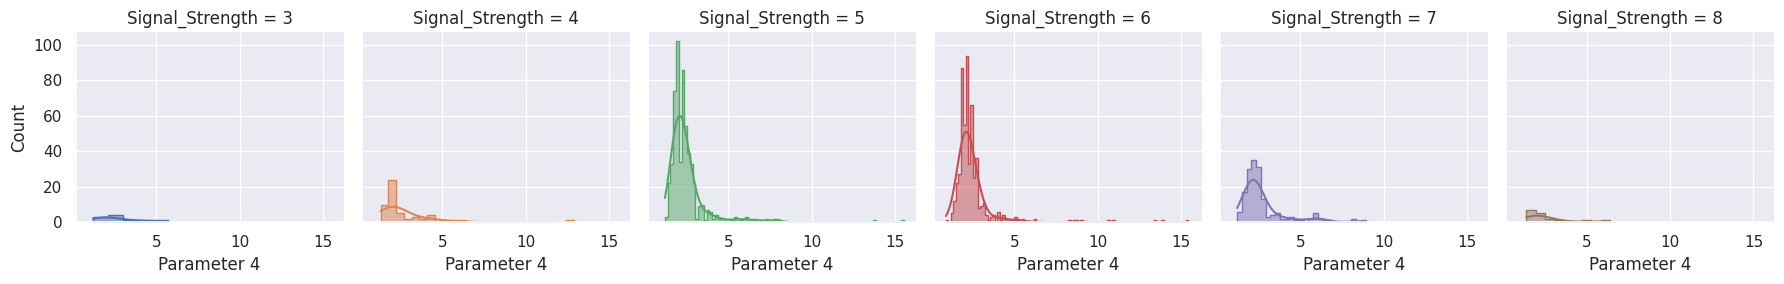

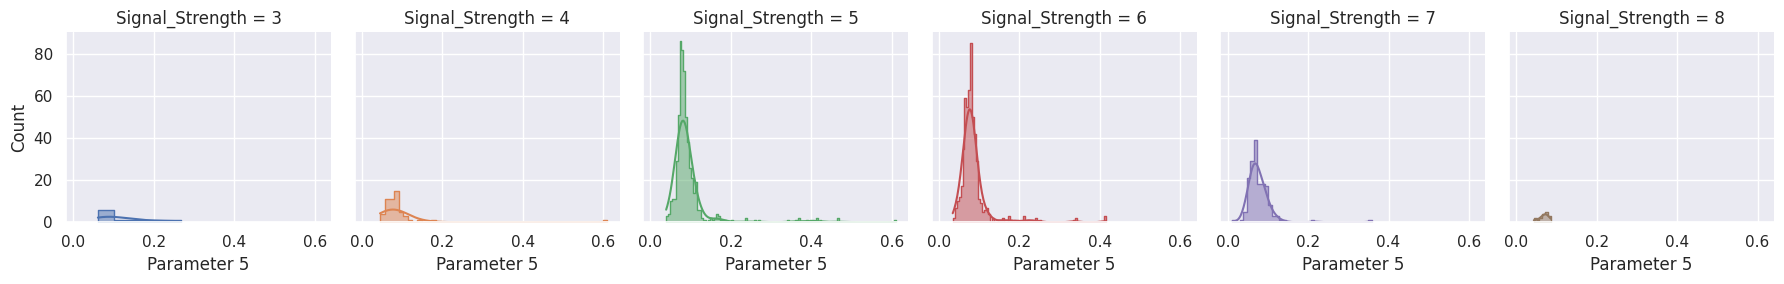

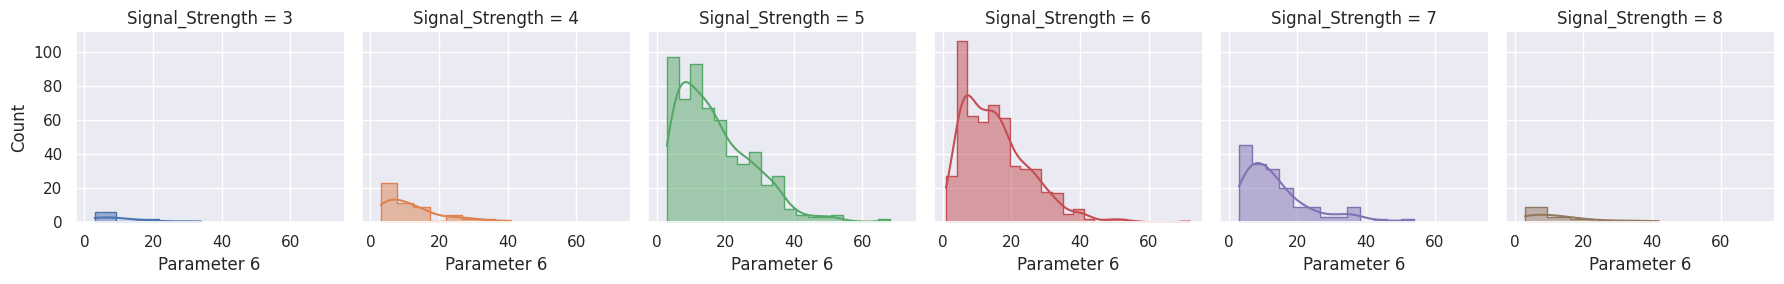

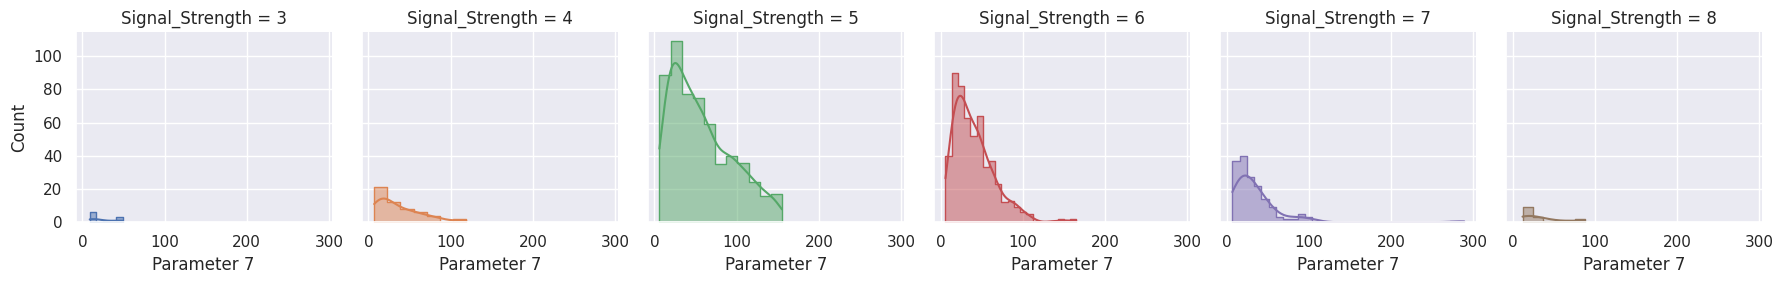

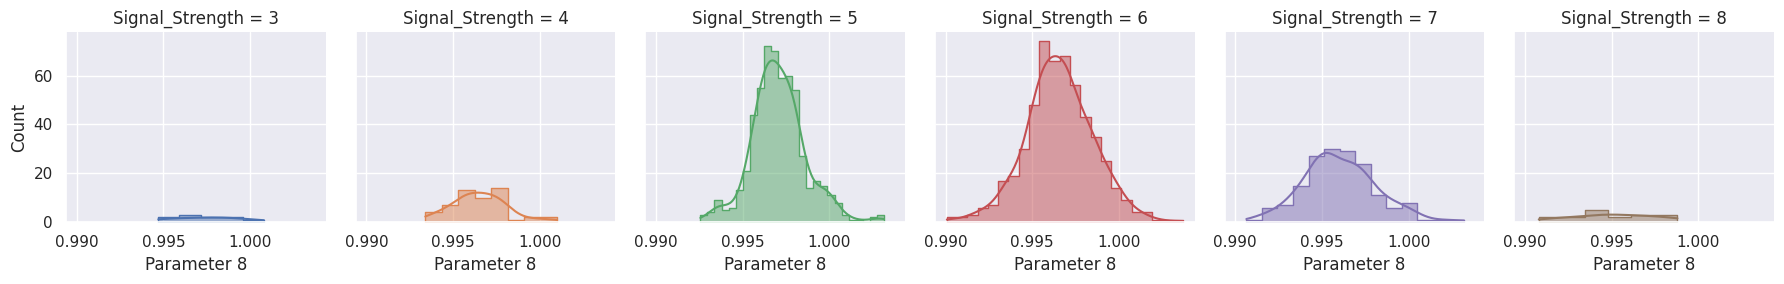

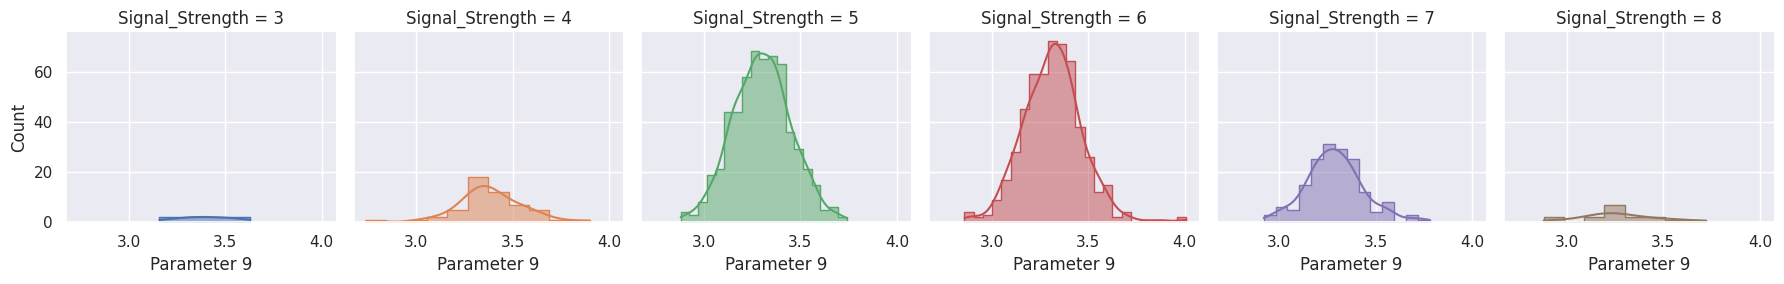

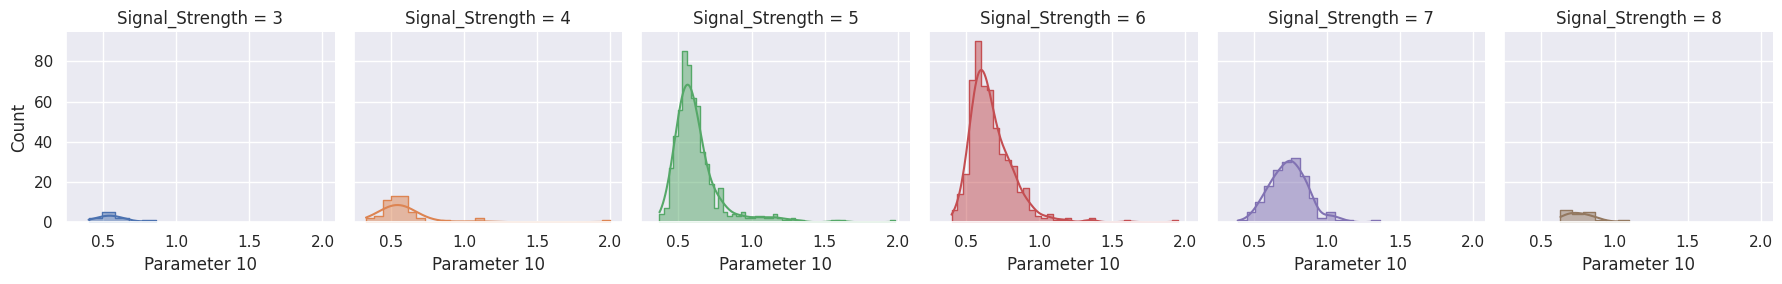

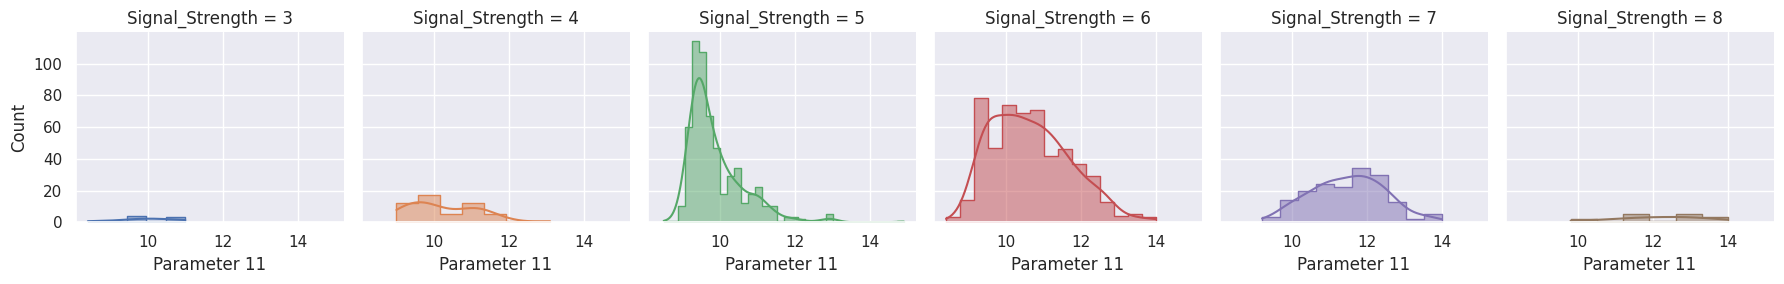

In [17]:
for param in parameters:
    g = sns.FacetGrid(signals_df, col="Signal_Strength", hue="Signal_Strength")
    g = g.map(sns.histplot, param, kde=True, element="step")
    plt.show()

In [18]:
signals_df["Signal_Strength"].value_counts()

5    577
6    535
7    167
4     53
8     17
3     10
Name: Signal_Strength, dtype: int64

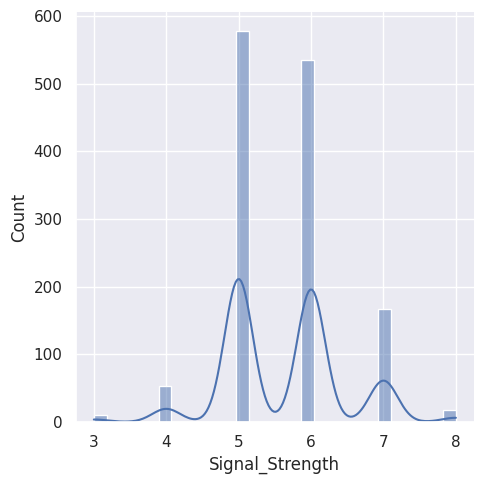

In [19]:
ax = sns.displot(signals_df, x="Signal_Strength", kde=True)

**Observation** 

1. 5 and 6 counts are relatively high. 3 and 8 are relatively low.
2. Parameter 4, 5, 6 and 7 have right skewed distribution when considering signal strength 5 and 6

## Data preprocessing

In [20]:
X = signals_df[parameters]
y = signals_df["Signal_Strength"]

In [21]:
X.shape

(1359, 11)

In [22]:
y.shape

(1359,)

In [23]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=13, shuffle=True, stratify=y
)

In [24]:
print(f"{X_train.shape=}")
print(f"{X_test.shape=}")
print(f"{y_train.shape=}")
print(f"{y_test.shape=}")

X_train.shape=(951, 11)
X_test.shape=(408, 11)
y_train.shape=(951,)
y_test.shape=(408,)


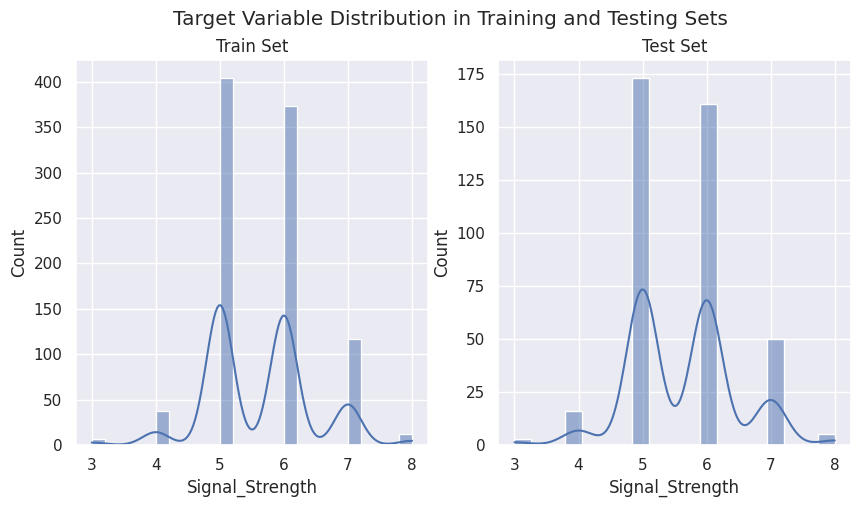

In [25]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10, 5))
sns.histplot(y_train, kde=True, ax=ax1)
ax1.set_title("Train Set")

sns.histplot(y_test, kde=True, ax=ax2)
ax2.set_title("Test Set")
fig.suptitle("Target Variable Distribution in Training and Testing Sets")
plt.show()

In [26]:
scaler = MinMaxScaler()
scaler.fit(X_train)
# X_train_scaled = pd.DataFrame(scaler.transform(X), columns=X.columns)
X_train_scaled = scaler.transform(X)

In [27]:
X_test_scaled = scaler.transform(X_test)

In [28]:
y_train_cat = tf.keras.utils.to_categorical(y_train)
y_test_cat = tf.keras.utils.to_categorical(y_test)

In [29]:
print(f"{y_train[0]=}")
print(f"{y_train_cat[0]=}")

y_train[0]=5
y_train_cat[0]=array([0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32)


In [30]:
y_train_cat.shape

(951, 9)

## Model Training & Evaluation using Neural Network

In [31]:
model_1 = tf.keras.models.Sequential(
    [
        tf.keras.layers.Dense(64, activation="relu", input_shape=(X_train.shape[1],)),
        tf.keras.layers.Dense(9, activation="softmax"),
    ]
)

# Compile the model
model_1.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

2023-04-05 09:08:02.093881: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [32]:
history_1 = model_1.fit(
    X_train, y_train_cat, epochs=20, batch_size=16, validation_data=(X_test, y_test_cat)
)

Epoch 1/20
60/60 [==============================] - 0s 4ms/step - loss: 3.3878 - accuracy: 0.3239 - val_loss: 1.3253 - val_accuracy: 0.4706
Epoch 2/20
60/60 [==============================] - 0s 769us/step - loss: 1.2287 - accuracy: 0.4669 - val_loss: 1.3427 - val_accuracy: 0.4436
Epoch 3/20
60/60 [==============================] - 0s 784us/step - loss: 1.1903 - accuracy: 0.4963 - val_loss: 1.2537 - val_accuracy: 0.4779
Epoch 4/20
60/60 [==============================] - 0s 766us/step - loss: 1.1723 - accuracy: 0.4858 - val_loss: 1.2819 - val_accuracy: 0.4559
Epoch 5/20
60/60 [==============================] - 0s 763us/step - loss: 1.1666 - accuracy: 0.5047 - val_loss: 1.2820 - val_accuracy: 0.4461
Epoch 6/20
60/60 [==============================] - 0s 753us/step - loss: 1.1907 - accuracy: 0.4753 - val_loss: 1.2416 - val_accuracy: 0.4436
Epoch 7/20
60/60 [==============================] - 0s 752us/step - loss: 1.1588 - accuracy: 0.4869 - val_loss: 1.2594 - val_accuracy: 0.4706
Epoch 8/

In [33]:
y_pred = model_1.predict(X_test)
y_pred_int = np.argmax(y_pred, axis=1)

In [34]:
print(classification_report(y_test, y_pred_int))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         3
           4       0.00      0.00      0.00        16
           5       0.65      0.47      0.54       173
           6       0.44      0.76      0.56       161
           7       0.29      0.04      0.07        50
           8       0.00      0.00      0.00         5

    accuracy                           0.50       408
   macro avg       0.23      0.21      0.20       408
weighted avg       0.48      0.50      0.46       408



In [35]:
def get_history_as_df(history) -> pd.DataFrame:
    history_df = pd.DataFrame(history.history)
    # Melt DataFrame to create long format
    history_df = history_df.reset_index().melt(id_vars="index")
    # Rename columns
    history_df.columns = ["epoch", "metric", "value"]
    return history_df


def plot_train_test_loss(history_df: pd.DataFrame):
    sns.lineplot(
        x="epoch",
        y="value",
        hue="metric",
        data=history_df[
            (history_df["metric"] == "loss") | (history_df["metric"] == "val_loss")
        ],
    )
    plt.title("Train/Test Loss")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.show()


def plot_train_test_accuracy(history_df: pd.DataFrame):
    sns.lineplot(
        x="epoch",
        y="value",
        hue="metric",
        data=history_df[
            (history_df["metric"] == "accuracy")
            | (history_df["metric"] == "val_accuracy")
        ],
    )
    plt.title("Train/Test Accuracy")
    plt.xlabel("Epoch")
    plt.ylabel("Accuracy")
    plt.show()

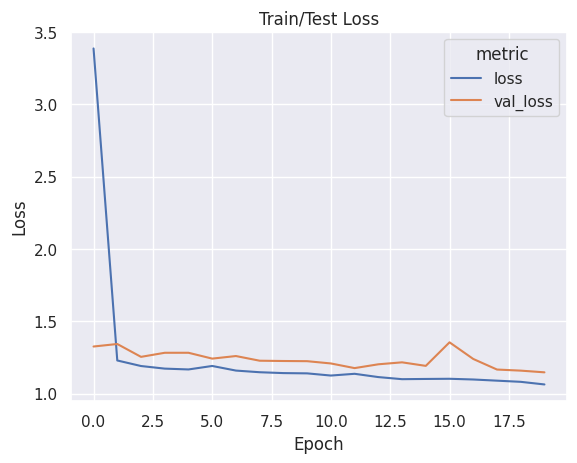

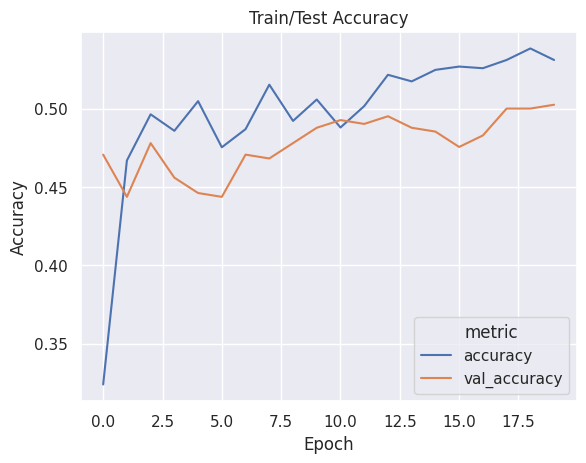

In [36]:
history_1_df = get_history_as_df(history_1)
plot_train_test_loss(history_1_df)
plot_train_test_accuracy(history_1_df)

New architecture/update existing architecture in attempt to improve the performance of the model.

In [37]:
model_2 = tf.keras.models.Sequential(
    [
        tf.keras.layers.Dense(64, activation="relu", input_shape=(X_train.shape[1],)),
        tf.keras.layers.Dense(
            64,
            activation="relu",
        ),
        tf.keras.layers.Dense(9, activation="softmax"),
    ]
)

# Compile the model
model_2.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

In [38]:
history_2 = model_2.fit(
    X_train, y_train_cat, epochs=20, batch_size=16, validation_data=(X_test, y_test_cat)
)

Epoch 1/20
60/60 [==============================] - 0s 2ms/step - loss: 1.9671 - accuracy: 0.4217 - val_loss: 1.4033 - val_accuracy: 0.5025
Epoch 2/20
60/60 [==============================] - 0s 789us/step - loss: 1.2255 - accuracy: 0.4795 - val_loss: 1.2824 - val_accuracy: 0.4755
Epoch 3/20
60/60 [==============================] - 0s 793us/step - loss: 1.2032 - accuracy: 0.4837 - val_loss: 1.2029 - val_accuracy: 0.4755
Epoch 4/20
60/60 [==============================] - 0s 786us/step - loss: 1.1885 - accuracy: 0.4911 - val_loss: 1.2979 - val_accuracy: 0.4363
Epoch 5/20
60/60 [==============================] - 0s 782us/step - loss: 1.1610 - accuracy: 0.5016 - val_loss: 1.2726 - val_accuracy: 0.4191
Epoch 6/20
60/60 [==============================] - 0s 787us/step - loss: 1.2034 - accuracy: 0.4984 - val_loss: 1.2085 - val_accuracy: 0.4142
Epoch 7/20
60/60 [==============================] - 0s 771us/step - loss: 1.1506 - accuracy: 0.5163 - val_loss: 1.2514 - val_accuracy: 0.4926
Epoch 8/

In [39]:
y_pred = model_2.predict(X_test)
y_pred_int = np.argmax(y_pred, axis=1)
print(classification_report(y_test, y_pred_int))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         3
           4       0.00      0.00      0.00        16
           5       0.63      0.53      0.58       173
           6       0.47      0.73      0.57       161
           7       0.42      0.10      0.16        50
           8       0.00      0.00      0.00         5

    accuracy                           0.53       408
   macro avg       0.25      0.23      0.22       408
weighted avg       0.51      0.53      0.49       408



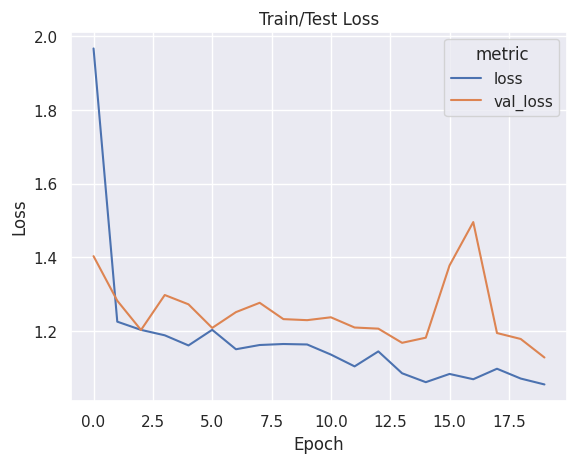

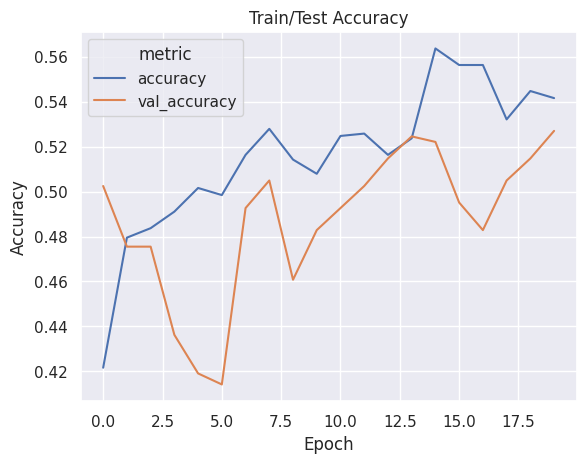

In [40]:
history_2_df = get_history_as_df(history_2)
plot_train_test_loss(history_2_df)
plot_train_test_accuracy(history_2_df)

The `class_weight` argument in the `fit()` function of TensorFlow allows to give more importance to certain classes or labels in your dataset during training. 
It is useful when dealing with imbalanced datasets where some classes have significantly fewer samples than others.

In [41]:
# using class weights for imabalanced data

# Compute class weights with sklearn method
class_labels = np.unique(y_train)
class_weights = compute_class_weight(
    class_weight="balanced", classes=class_labels, y=y_train
)
class_weights_map = {
    0: np.float64(0.0),
    1: np.float64(0.0),
    2: np.float64(0.0),
    3: class_weights[0],
    4: class_weights[1],
    5: class_weights[2],
    6: class_weights[3],
    7: class_weights[4],
    8: class_weights[5],
}

In [42]:
class_weights_map

{0: 0.0,
 1: 0.0,
 2: 0.0,
 3: 22.642857142857142,
 4: 4.283783783783784,
 5: 0.39232673267326734,
 6: 0.42379679144385024,
 7: 1.3547008547008548,
 8: 13.208333333333334}

In [43]:
history_2 = model_2.fit(
    X_train,
    y_train_cat,
    epochs=20,
    batch_size=16,
    class_weight=class_weights_map,
    validation_data=(X_test, y_test_cat),
)

Epoch 1/20
60/60 [==============================] - 0s 1ms/step - loss: 2.1435 - accuracy: 0.3176 - val_loss: 1.7417 - val_accuracy: 0.2647
Epoch 2/20
60/60 [==============================] - 0s 1ms/step - loss: 1.8768 - accuracy: 0.2513 - val_loss: 1.6085 - val_accuracy: 0.3211
Epoch 3/20
60/60 [==============================] - 0s 1ms/step - loss: 1.6660 - accuracy: 0.3165 - val_loss: 1.4347 - val_accuracy: 0.3946
Epoch 4/20
60/60 [==============================] - 0s 1ms/step - loss: 1.7137 - accuracy: 0.2766 - val_loss: 1.4466 - val_accuracy: 0.4363
Epoch 5/20
60/60 [==============================] - 0s 1ms/step - loss: 1.5410 - accuracy: 0.3028 - val_loss: 1.9386 - val_accuracy: 0.2255
Epoch 6/20
60/60 [==============================] - 0s 1ms/step - loss: 1.5871 - accuracy: 0.3239 - val_loss: 2.1762 - val_accuracy: 0.0588
Epoch 7/20
60/60 [==============================] - 0s 1ms/step - loss: 1.4400 - accuracy: 0.3207 - val_loss: 1.5630 - val_accuracy: 0.3627
Epoch 8/20
60/60 [==

In [44]:
y_pred = model_2.predict(X_test)
y_pred_int = np.argmax(y_pred, axis=1)
print(classification_report(y_test, y_pred_int))

              precision    recall  f1-score   support

           3       0.12      0.33      0.18         3
           4       0.05      0.19      0.08        16
           5       0.76      0.30      0.43       173
           6       0.47      0.38      0.42       161
           7       0.21      0.52      0.30        50
           8       0.06      0.20      0.10         5

    accuracy                           0.35       408
   macro avg       0.28      0.32      0.25       408
weighted avg       0.54      0.35      0.39       408



**Observation**

- Compared to the first model (model_1), second model has better weighted average. 
- The second model when trained with `class_weights` as argument is alble to now classify signals strength for which we don't have much data. These are 3, 4 and 8.
- In both the cases the model is able to idenitfy the true positives much better for Signal_Strength 5.

- **Data Description**: The SVHN is a real-world image dataset for developing machine learning and object recognition algorithms with the
minimal requirement on data formatting but comes from a signi icantly harder, unsolved, real-world problem (recognising digits and
numbers in natural scene images). SVHN is obtained from house numbers in Google Street View images. Where the labels for each of this image are the prominent number in that image i.e. 2,6,7 and 4 respectively.

To build a digit classifier on the SVHN (Street View Housing Number) dataset.

The dataset has been provided in the form of h5py files. You can read about this ile format here: https://docs.h5py.org/en/stable/
Acknowledgement: Yuval Netzer, Tao Wang, Adam Coates, Alessandro Bissacco, Bo Wu, Andrew Y. Ng Reading Digits in Natural Images with Unsupervised
Feature Learning NIPS Workshop on Deep Learning and Unsupervised Feature Learning 2011. PDF
http://ufldl.stanford.edu/housenumbers as the URL for this site.




## Data Import and Exploration

In [45]:
# https://www.kaggle.com/datasets/sasha18/street-view-house-nos-h5-file
svhn_data = h5py.File("data/Autonomous_Vehicles_SVHN_single_grey1.h5", "r")

In [46]:
svhn_data.keys()

<KeysViewHDF5 ['X_test', 'X_train', 'X_val', 'y_test', 'y_train', 'y_val']>

In [84]:
X_train, X_test, y_train, y_test = (
    svhn_data["X_train"],
    svhn_data["X_test"],
    svhn_data["y_train"],
    svhn_data["y_test"],
)

In [85]:
X_train, X_test, y_train, y_test = (
    np.float64(X_train),
    np.float64(X_test),
    np.int32(y_train),
    np.int32(y_test),
)

In [86]:
X_train.shape

(42000, 32, 32)

## Data Visualisation and preprocessing

In [87]:
print(f"{X_train.shape=}")
print(f"{X_test.shape=}")
print(f"{y_train.shape=}")
print(f"{y_test.shape=}")

X_train.shape=(42000, 32, 32)
X_test.shape=(18000, 32, 32)
y_train.shape=(42000,)
y_test.shape=(18000,)


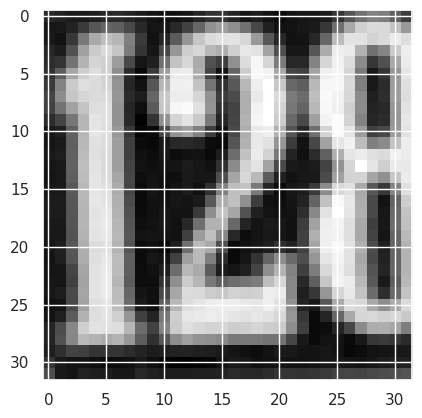

Label: 2


In [88]:
plt.imshow(X_train[0], cmap="gray")
plt.show()

print(f"Label: {y_train[0]}")

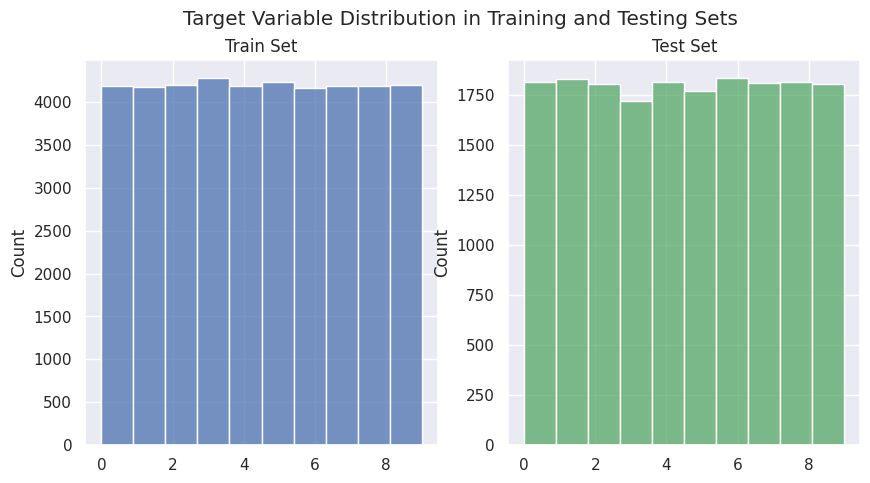

In [89]:
# Train test label distribution
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10, 5))
sns.histplot(np.array(y_train), ax=ax1, binwidth=0.9)
ax1.set_title("Train Set")

sns.histplot(np.array(y_test), ax=ax2, binwidth=0.9, color="g")
ax2.set_title("Test Set")
fig.suptitle("Target Variable Distribution in Training and Testing Sets")
plt.show()

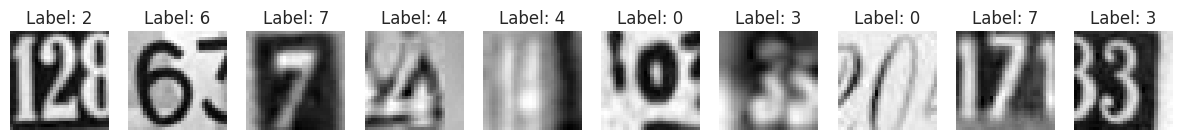

In [90]:
fig, axs = plt.subplots(1, 10, figsize=(15, 15))
for i in range(10):
    axs[i].imshow(X_train[i], cmap="gray")
    axs[i].set_title(f"Label: {y_train[i]}")
    axs[i].axis("off")
plt.show()

In [91]:
X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)

In [92]:
X_train.shape

(42000, 1024)

In [56]:
X_train[0].shape

(1024,)

In [95]:
scaler = MinMaxScaler()
X_train = X_train.astype("float32")
X_test = X_test.astype("float32")

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

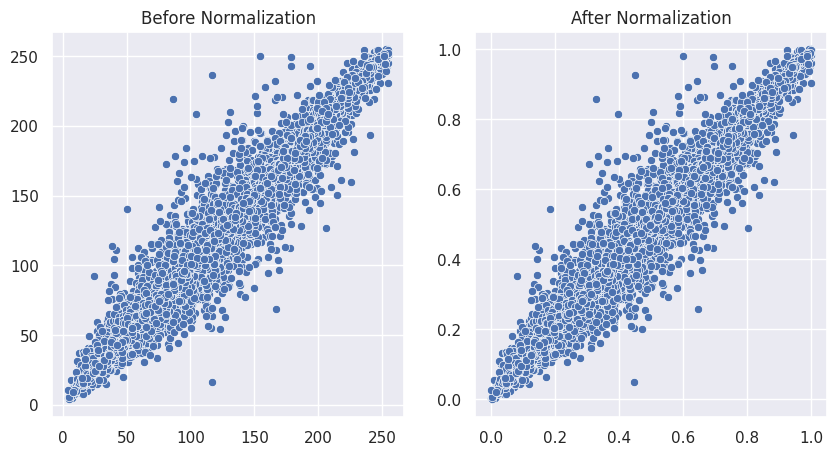

In [96]:
# Train test label distribution
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10, 5))
sns.scatterplot(x=X_train[:, 0], y=X_train[:, 1], ax=ax1)
ax1.set_title("Before Normalization")

sns.scatterplot(x=X_train_scaled[:, 0], y=X_train_scaled[:, 1], ax=ax2)
ax2.set_title("After Normalization")

plt.show()

In [97]:
y_train_cat = tf.keras.utils.to_categorical(y_train)
y_test_cat = tf.keras.utils.to_categorical(y_test)

In [98]:
print(f"Total number of classes in train labels: {len(np.unique(y_train))}")
print(f"Total number of classes in test labels: {len(np.unique(y_test))}")

Total number of classes in train labels: 10
Total number of classes in test labels: 10


## Model Training & Evaluation using Neural Network.

In [99]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(512, activation="relu", input_shape=(1024,)))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dropout(0.3))
model.add(tf.keras.layers.Dense(256, activation="relu"))
model.add(tf.keras.layers.Dense(10, activation="softmax"))

model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

In [100]:
history = model.fit(
    X_train_scaled,
    y_train_cat,
    epochs=15,
    batch_size=32,
    validation_data=(X_test_scaled, y_test_cat),
)

Epoch 1/15
1313/1313 [==============================] - 5s 3ms/step - loss: 1.6122 - accuracy: 0.4661 - val_loss: 1.8688 - val_accuracy: 0.4168
Epoch 2/15
1313/1313 [==============================] - 4s 3ms/step - loss: 1.3431 - accuracy: 0.5640 - val_loss: 1.2675 - val_accuracy: 0.6016
Epoch 3/15
1313/1313 [==============================] - 4s 3ms/step - loss: 1.3317 - accuracy: 0.5669 - val_loss: 1.1760 - val_accuracy: 0.6171
Epoch 4/15
1313/1313 [==============================] - 4s 3ms/step - loss: 1.2575 - accuracy: 0.5945 - val_loss: 2.8502 - val_accuracy: 0.3399
Epoch 5/15
1313/1313 [==============================] - 4s 3ms/step - loss: 1.2580 - accuracy: 0.5926 - val_loss: 1.1544 - val_accuracy: 0.6309
Epoch 6/15
1313/1313 [==============================] - 4s 3ms/step - loss: 1.2210 - accuracy: 0.6071 - val_loss: 1.1157 - val_accuracy: 0.6397
Epoch 7/15
1313/1313 [==============================] - 4s 3ms/step - loss: 1.2562 - accuracy: 0.5894 - val_loss: 1.0968 - val_accuracy:

In [101]:
y_pred = model.predict(X_test)
y_pred_int = np.argmax(y_pred, axis=1)
print(classification_report(y_test, y_pred_int))

              precision    recall  f1-score   support

           0       0.53      0.50      0.52      1814
           1       0.65      0.40      0.50      1828
           2       0.58      0.55      0.56      1803
           3       0.44      0.47      0.45      1719
           4       0.56      0.78      0.65      1812
           5       0.67      0.51      0.58      1768
           6       0.49      0.58      0.53      1832
           7       0.45      0.79      0.57      1808
           8       0.57      0.35      0.44      1812
           9       0.65      0.48      0.55      1804

    accuracy                           0.54     18000
   macro avg       0.56      0.54      0.54     18000
weighted avg       0.56      0.54      0.54     18000



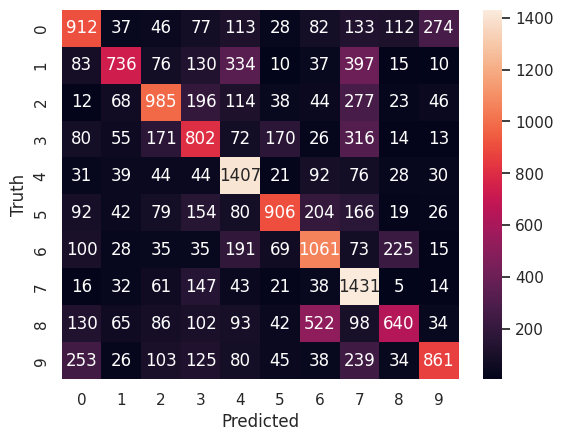

In [102]:
cm = confusion_matrix(y_test, y_pred_int)

sns.heatmap(cm, annot=True, fmt="d")
plt.xlabel("Predicted")
plt.ylabel("Truth")
plt.show()

In [103]:
# Let's try to visualize images which were mis-classified

misclassified_indices = np.where(y_pred_int != y_test)[0]

In [104]:
len(misclassified_indices)

8259

In [109]:
X_test_copy = scaler.inverse_transform(X_test.copy())
X_test_copy = X_test_copy.reshape(-1, 32, 32, 1)

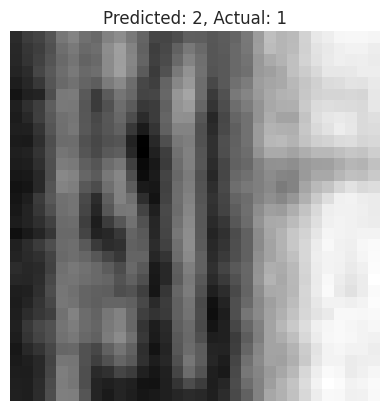

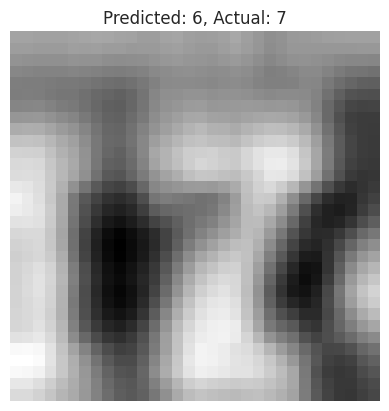

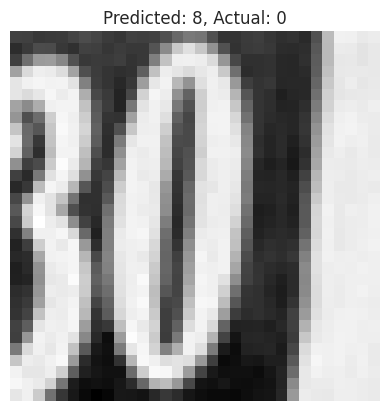

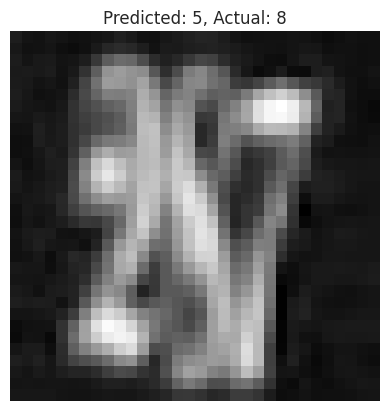

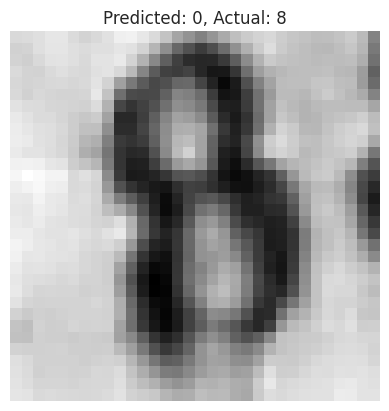

In [111]:
for i in range(5):
    index = misclassified_indices[i]
    plt.imshow(X_test_copy[index], cmap='gray')
    plt.title(f"Predicted: {y_pred_int[index]}, Actual: {y_test[index]}")
    plt.axis("off")
    plt.show()

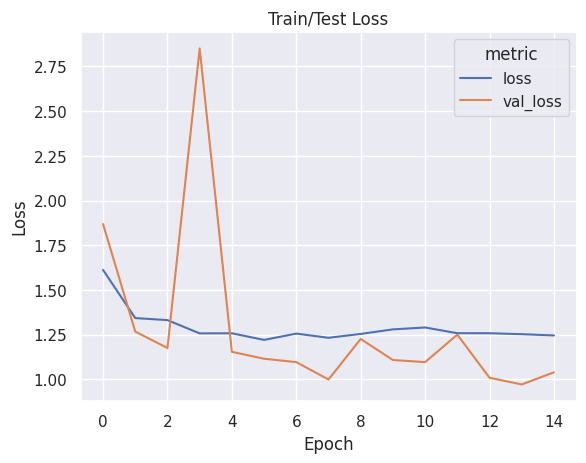

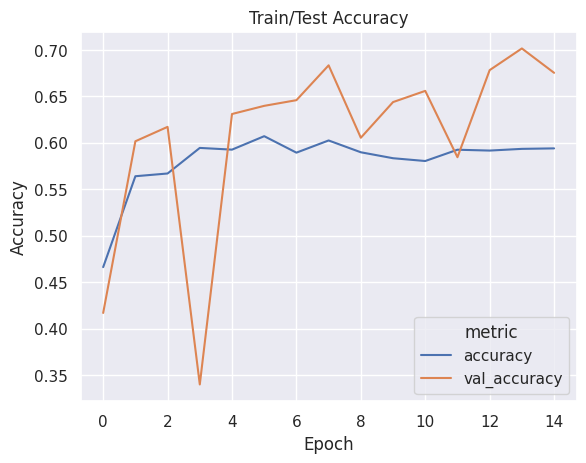

In [112]:
history_df = get_history_as_df(history)
plot_train_test_loss(history_df)
plot_train_test_accuracy(history_df)

**Observations**

1. Using Dropout layer improves the overall model accuracy
2. The validation accuracy increases over every epoch and we can notice the training accuracy saturating after 8th epoch.
3. In the case of training loss too we see it saturating after 10th epoch and validation loss decreasing.
4. We also ploted the images which were misclassified and the observation is some of the images probably have lower resolution to classify them properly.